In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1. MATRIZ P — passeio aleatório puro (antes de correções)
# ---------------------------------------------------------
P = np.array([
    [0,   1/2, 1/2, 0,   0,   0],
    [1/2, 0,   1/2, 0,   0,   0],
    [1/2, 1/2, 0,   0,   0,   0],
    [1/3, 0,   0,   0,   1/3, 1/3],
    [0,   0,   1/3, 1/3, 0,   1/3],
    [0,   0,   0,   0,   0,   0],   # nó 6 é pendente
])

n = P.shape[0]

# ---------------------------------------------------------
# 2. CORREÇÃO DOS VÉRTICES PENDENTES
#    Q = P + (1/n) * u * 1ᵗ
# ---------------------------------------------------------
u = (P.sum(axis=1) == 0).astype(float)   # vetor coluna de vértices pendentes
Q = P + np.outer(u, np.ones(n)/n)        # adiciona linhas uniformes

# ---------------------------------------------------------
# 3. TELEPORT / ERGODICIDADE
#    R = α Q + (1−α) * (1/n) * 1 * 1ᵗ
# ---------------------------------------------------------
alpha = 0.99
R = alpha * Q + (1 - alpha) * np.ones((n, n))/n

# ---------------------------------------------------------
# 4. MÉTODO DAS POTÊNCIAS
# ---------------------------------------------------------
sigma = np.ones(n)/n   # distribuição inicial uniforme
eps = 1e-6
max_iter = 100

history = [sigma.copy()]

for t in range(max_iter):
    sigma_next = sigma @ R
    diff = np.linalg.norm(sigma_next - sigma, 1)
    history.append(sigma_next.copy())
    sigma = sigma_next
    if diff < eps:
        print(f"Convergência atingida em {t+1} iterações (|Δ|₁ = {diff:.2e})")
        break

# ---------------------------------------------------------
# 5. RESULTADO FINAL
# ---------------------------------------------------------
pagerank = sigma / sigma.sum()   # normaliza para soma=1
print("\nVetor de PageRank (r):")
for i, val in enumerate(pagerank, start=1):
    print(f"  Página {i}: {val:.4f}")




Convergência atingida em 26 iterações (|Δ|₁ = 6.98e-07)

Vetor de PageRank (r):
  Página 1: 0.3295
  Página 2: 0.3287
  Página 3: 0.3295
  Página 4: 0.0037
  Página 5: 0.0037
  Página 6: 0.0049


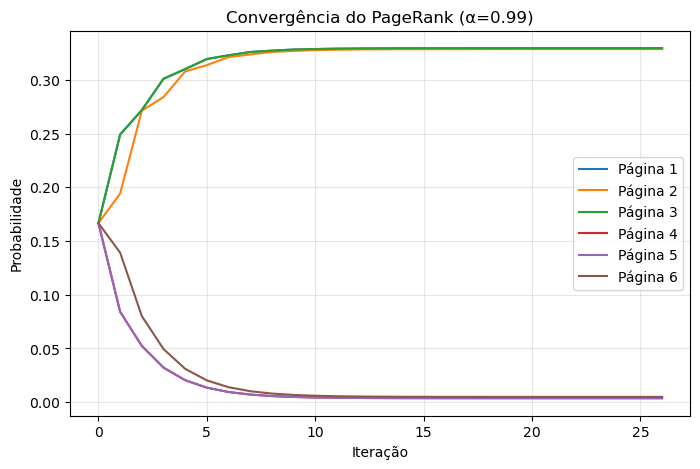

In [8]:
# ---------------------------------------------------------
# 6. VISUALIZAÇÃO DA CONVERGÊNCIA
# ---------------------------------------------------------
history = np.array(history)
plt.figure(figsize=(8,5))
for i in range(n):
    plt.plot(history[:, i], label=f"Página {i+1}")
plt.xlabel("Iteração")
plt.ylabel("Probabilidade")
plt.title(f"Convergência do PageRank (α={alpha})")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()